In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.svm import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("DataET0.csv",sep=";")


In [3]:
df

,Date/heure,moy_Temp[°C],max_Temp[°C],min_Temp[°C],moy_DewPoint[°C],min_DewPoint[°C],moy_SolarRadiation[W/m2],moy_VPD[kPa],min_VPD[kPa],moy_RelativeHumidity[%],max_RelativeHumidity[%],min_RelativeHumidity[%],Somme_Precipitation[mm],moy_WindSpeed[m/s],max_WindSpeed[m/s],max_WindSpeedMax[m/s],moy_WindDirection[deg],dernier_WindDirection[deg],ETP quotidien [mm]
0,05/08/2022 00:00,"24,73","35,08","15,11","12,4","8,8",361,"1,9","0,3","51,87","83,3",22,0,"0,5","2,1","4,4",NaN,NaN,NaN
1,04/08/2022 00:00,"25,26","35,79","16,4","14,6",8,288,"1,73",0,"59,06","99,54","19,84",0,"0,6","1,7","5,3",NaN,NaN,5
2,03/08/2022 00:00,"28,37","36,71","19,8","12,3","7,4",285,"2,56","0,95","38,43","65,76","23,6",0,"0,7","2,6","5,3",NaN,NaN,"5,3"
3,02/08/2022 00:00,"32,17","43,43","19,68","0,9","-4,7",296,"4,55","1,7","16,44","38,56","5,23",0,"0,6","2,3","6,6",NaN,NaN,"5,3"
4,01/08/2022 00:00,"32,3","41,9","21,26","8,7","1,5",290,"3,97","1,39","26,68","47,56","9,52",0,"0,6","2,7","6,7",NaN,NaN,"5,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,04/09/2017 00:00,"26,19","27,22","25,43",19,"17,9",0,"1,18","1,04","65,12","68,01","57,11","5,4",0,"0,5",NaN,NaN,NaN,"0,6"
1777,06/06/2017 00:00,"26,21","26,42","25,51","17,4","17,2",0,"1,4","1,28","58,5","60,93","57,18",0,0,0,NaN,299.0,299.0,NaN
1778,05/06/2017 00:00,"26,31","26,47","26,1",16,"15,3",0,"1,58","1,48","53,43","56,89","51,64",0,0,0,NaN,228.0,228.0,NaN
1779,10/04/2017 00:00,"23,58","23,92","22,89","14,9","14,1",2,"1,2","1,13","58,56","61,86","56,71",0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

for i in df.columns:
    sum = df[i].isnull().sum() 
    print(" NaN en " ,i ," = ",sum)

 NaN en  Date/heure  =  0
 NaN en  moy_Temp[°C]  =  0
 NaN en  max_Temp[°C]  =  0
 NaN en  min_Temp[°C]  =  0
 NaN en  moy_DewPoint[°C]  =  0
 NaN en  min_DewPoint[°C]  =  0
 NaN en  moy_SolarRadiation[W/m2]  =  0
 NaN en  moy_VPD[kPa]  =  0
 NaN en  min_VPD[kPa]  =  0
 NaN en  moy_RelativeHumidity[%]  =  0
 NaN en  max_RelativeHumidity[%]  =  0
 NaN en  min_RelativeHumidity[%]  =  0
 NaN en  Somme_Precipitation[mm]  =  0
 NaN en  moy_WindSpeed[m/s]  =  2
 NaN en  max_WindSpeed[m/s]  =  2
 NaN en  max_WindSpeedMax[m/s]  =  103
 NaN en  moy_WindDirection[deg]  =  1779
 NaN en  dernier_WindDirection[deg]  =  1779
 NaN en  ETP quotidien [mm]  =  6


In [5]:
for i in df.columns:
  somme = df[i].isnull().sum() 
  if(somme != 0):
    mediane = pd.to_numeric(df[i],errors='coerce').mean()
    df[i] = df[i].fillna(mediane) 

In [6]:
nbrc=df.columns
for i in nbrc:
    sum = df[i].isnull().sum() 
    print(" NaN en " ,i ," = ",sum)

 NaN en  Date/heure  =  0
 NaN en  moy_Temp[°C]  =  0
 NaN en  max_Temp[°C]  =  0
 NaN en  min_Temp[°C]  =  0
 NaN en  moy_DewPoint[°C]  =  0
 NaN en  min_DewPoint[°C]  =  0
 NaN en  moy_SolarRadiation[W/m2]  =  0
 NaN en  moy_VPD[kPa]  =  0
 NaN en  min_VPD[kPa]  =  0
 NaN en  moy_RelativeHumidity[%]  =  0
 NaN en  max_RelativeHumidity[%]  =  0
 NaN en  min_RelativeHumidity[%]  =  0
 NaN en  Somme_Precipitation[mm]  =  0
 NaN en  moy_WindSpeed[m/s]  =  0
 NaN en  max_WindSpeed[m/s]  =  0
 NaN en  max_WindSpeedMax[m/s]  =  0
 NaN en  moy_WindDirection[deg]  =  0
 NaN en  dernier_WindDirection[deg]  =  0
 NaN en  ETP quotidien [mm]  =  0


# 1.5 affichage des types des colonne de notre dataFrame "DataET0"

In [7]:
for i in df.columns:
    print(" Type de la Colunne" , i , "est :" ,df[i].dtype )

 Type de la Colunne Date/heure est : object
 Type de la Colunne moy_Temp[°C] est : object
 Type de la Colunne max_Temp[°C] est : object
 Type de la Colunne min_Temp[°C] est : object
 Type de la Colunne moy_DewPoint[°C] est : object
 Type de la Colunne min_DewPoint[°C] est : object
 Type de la Colunne moy_SolarRadiation[W/m2] est : int64
 Type de la Colunne moy_VPD[kPa] est : object
 Type de la Colunne min_VPD[kPa] est : object
 Type de la Colunne moy_RelativeHumidity[%] est : object
 Type de la Colunne max_RelativeHumidity[%] est : object
 Type de la Colunne min_RelativeHumidity[%] est : object
 Type de la Colunne Somme_Precipitation[mm] est : object
 Type de la Colunne moy_WindSpeed[m/s] est : object
 Type de la Colunne max_WindSpeed[m/s] est : object
 Type de la Colunne max_WindSpeedMax[m/s] est : object
 Type de la Colunne moy_WindDirection[deg] est : float64
 Type de la Colunne dernier_WindDirection[deg] est : float64
 Type de la Colunne ETP quotidien [mm] est : object


# clean dataFrame :

In [8]:
data_frame=df
def get_columns_type(data_frame:pd.DataFrame):
  for columnName in data_frame.columns:
    print(f"Type de {columnName} est {data_frame[columnName].dtype}")


In [9]:

def replace_columns_type(data_frame:pd.DataFrame,target_column:str,replacement:str):
  for columnName in data_frame.columns:
    if data_frame[columnName].dtype == target_column:
      data_frame[columnName] = data_frame[columnName].astype(replacement)
  return data_frame

In [10]:
def convertissement_Nece(data_frame:pd.DataFrame):
  data_frame = data_frame.drop("dernier_WindDirection[deg]",axis=1)
  data_frame = data_frame.drop("moy_WindDirection[deg]",axis=1)
  data_frame = data_frame.drop("Date/heure",axis=1)
  for columnName in data_frame.columns:
    for index in range(len(data_frame[columnName])):
      formated_str = str(data_frame[columnName][index]).replace(",",".")
      data_frame[columnName].iloc[index] = formated_str
  return data_frame

In [11]:
print("type initial des donnees est :")
get_columns_type(data_frame)
print("nouveau type des donnes devient :")
data_frame = convertissement_Nece(data_frame)
data_frame = replace_columns_type(data_frame,"object","float")
get_columns_type(data_frame)

type initial des donnees est :
Type de Date/heure est object
Type de moy_Temp[°C] est object
Type de max_Temp[°C] est object
Type de min_Temp[°C] est object
Type de moy_DewPoint[°C] est object
Type de min_DewPoint[°C] est object
Type de moy_SolarRadiation[W/m2] est int64
Type de moy_VPD[kPa] est object
Type de min_VPD[kPa] est object
Type de moy_RelativeHumidity[%] est object
Type de max_RelativeHumidity[%] est object
Type de min_RelativeHumidity[%] est object
Type de Somme_Precipitation[mm] est object
Type de moy_WindSpeed[m/s] est object
Type de max_WindSpeed[m/s] est object
Type de max_WindSpeedMax[m/s] est object
Type de moy_WindDirection[deg] est float64
Type de dernier_WindDirection[deg] est float64
Type de ETP quotidien [mm] est object
nouveau type des donnes devient :


C:\Users\ZenBook\AppData\Local\Temp\ipykernel_13436\4241333366.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[columnName].iloc[index] = formated_str


Type de moy_Temp[°C] est float64
Type de max_Temp[°C] est float64
Type de min_Temp[°C] est float64
Type de moy_DewPoint[°C] est float64
Type de min_DewPoint[°C] est float64
Type de moy_SolarRadiation[W/m2] est float64
Type de moy_VPD[kPa] est float64
Type de min_VPD[kPa] est float64
Type de moy_RelativeHumidity[%] est float64
Type de max_RelativeHumidity[%] est float64
Type de min_RelativeHumidity[%] est float64
Type de Somme_Precipitation[mm] est float64
Type de moy_WindSpeed[m/s] est float64
Type de max_WindSpeed[m/s] est float64
Type de max_WindSpeedMax[m/s] est float64
Type de ETP quotidien [mm] est float64


# division de dataEt0 en deux partie

In [12]:
df['ETP quotidien [mm]']

0       2.757991
1              5
2            5,3
3            5,3
4            5,5
          ...   
1776         0,6
1777    2.757991
1778    2.757991
1779    2.757991
1780    2.757991
Name: ETP quotidien [mm], Length: 1781, dtype: object

In [13]:
dt = data_frame.to_numpy()
features = dt.shape[1]
X,y = dt[:,:features - 1],dt[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Random Forest

In [14]:
pipeline = Pipeline([('StandarScaler', StandardScaler()),
                  ('RandomForest',RandomForestRegressor())
                  ])
parameters = {
              'RandomForest__n_estimators':np.arange(1,10,1),
              'RandomForest__max_depth':np.arange(3,15,1)
              }
gridSearchCv = GridSearchCV(estimator = pipeline,cv = 5,scoring = 'neg_mean_squared_error',param_grid = parameters)                      # Grid search for n estimator and longuer d'arbre
gridSearchCv.fit(X_train, y_train)
randomForestModel = gridSearchCv.best_estimator_
print("Le score du RandomForest modèle est: ",gridSearchCv.best_score_)



Le score du RandomForest modèle est:  -0.0693328956777974


# svr

In [15]:

pipeline = Pipeline([
                ('StandardScaler', StandardScaler()),
                ('SVR', SVR(kernel="rbf",gamma = 0.01))
                ])
parameters = {
              'SVR__gamma': np.linspace(0.1,1,2),
              'SVR__kernel':np.array(["rbf"]),
              'SVR__C':np.linspace(0,1,2)
              }
gridSearchCv = GridSearchCV(estimator = pipeline,cv = 5,scoring = 'neg_mean_squared_error',param_grid = parameters)# Grid search for gamma
gridSearchCv.fit(X_train, y_train)
Model_SVR = gridSearchCv.best_estimator_
print("Le score du modèle SVR est: ",gridSearchCv.best_score_)

C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ZenBook\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_see

Le score du modèle SVR est:  -0.08441257763664553


# arbre de decision

In [16]:
pipeline = Pipeline([('StandarScaler', StandardScaler()),
                  ('DecisionTreeRegressor',DecisionTreeRegressor())
                  ])
parameters = {
              'DecisionTreeRegressor__max_depth':np.arange(3,15,1)
              }
gridSearchCv = GridSearchCV(estimator = pipeline,cv = 5,scoring = 'neg_mean_squared_error',param_grid = parameters)# Grid search for longuer d'arbre
gridSearchCv.fit(X_train, y_train)
decisionTreeRegressor = gridSearchCv.best_estimator_

print("Le score du modèle Decision Tree est: ",gridSearchCv.best_score_)

Le score du modèle Decision Tree est:  -0.13661274827140163


# Non Linear regression

In [17]:
pipeline = Pipeline([('StandarScaler', StandardScaler()),
                  ('Polynomialfeatures', PolynomialFeatures(8)),
                  ('LinearRegression',LinearRegression())
                  ])
parameters = {
              'Polynomialfeatures__degree': np.arange(1,4,1),
              }
gridSearchCv = GridSearchCV(estimator = pipeline,cv = 5,scoring = 'neg_mean_squared_error',param_grid = parameters)
gridSearchCv.fit(X_train, y_train)
linearModel = gridSearchCv.best_estimator_

print("Le score du modèle Reg Non Lineaire est: ",gridSearchCv.best_score_)

Le score du modèle Reg Non Lineaire est:  -0.04289151707107406


In [18]:
def calcul_des_metriques(model,modelName,y,ypred):
  error_Moyenne = mean_squared_error(y,ypred)
  error_Absolue = mean_absolute_error(y,ypred)
  print("L'erreur moyenne {} est {:.2f}".format(modelName,error_Moyenne))
  print("L'erreur absolue {} est {:.2f}".format(modelName,error_Absolue))
  return error_Moyenne

In [19]:
errorDecision = calcul_des_metriques(decisionTreeRegressor,"Arbre de decision",y_test,decisionTreeRegressor.predict(X_test))
erreur_SVR = calcul_des_metriques(Model_SVR,"Modèle SVR",y_test,Model_SVR.predict(X_test))
error_Model_lineair = calcul_des_metriques(linearModel,"Regression Non Lineaire ",y_test,linearModel.predict(X_test))
error_Random_forest = calcul_des_metriques(randomForestModel,"Random Forest",y_test,randomForestModel.predict(X_test))

L'erreur moyenne Arbre de decision est 0.11
L'erreur absolue Arbre de decision est 0.23
L'erreur moyenne Modèle SVR est 0.05
L'erreur absolue Modèle SVR est 0.14
L'erreur moyenne Regression Non Lineaire  est 0.05
L'erreur absolue Regression Non Lineaire  est 0.14
L'erreur moyenne Random Forest est 0.07
L'erreur absolue Random Forest est 0.17


In [20]:
erreur_de_donnee = np.array([["SVR",erreur_SVR,Model_SVR],["Regression Non Lineaire",error_Model_lineair,linearModel],["Random Forest",error_Random_forest,randomForestModel],["Arbre de decision",errorDecision,decisionTreeRegressor]])
erreur_minimal = np.argmin(erreur_de_donnee[:,1])
meilleur_Model = erreur_de_donnee[erreur_minimal,2]
print(f" {erreur_de_donnee[erreur_minimal,0]} le meilleur model avec une erreur {erreur_de_donnee[1,erreur_minimal]}")

 Regression Non Lineaire le meilleur model avec une erreur 0.04625289185839995


C:\Users\ZenBook\AppData\Local\Temp\ipykernel_13436\682752848.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  erreur_de_donnee = np.array([["SVR",erreur_SVR,Model_SVR],["Regression Non Lineaire",error_Model_lineair,linearModel],["Random Forest",error_Random_forest,randomForestModel],["Arbre de decision",errorDecision,decisionTreeRegressor]])


# Plot

L'erreur moyenne Modèle SVR est 0.05
L'erreur absolue Modèle SVR est 0.14
L'erreur moyenne Regression Non Lineaire par polynome est 0.05
L'erreur absolue Regression Non Lineaire par polynome est 0.14
L'erreur moyenne Random Forest est 0.07
L'erreur absolue Random Forest est 0.17
L'erreur moyenne Arbre de decision est 0.11
L'erreur absolue Arbre de decision est 0.23


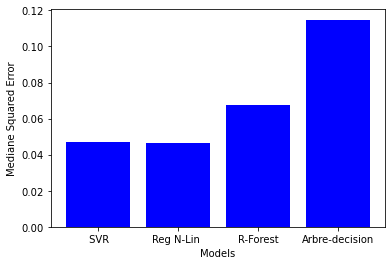

In [21]:
error_Moyenne = []
error_Moyenne.append(calcul_des_metriques(Model_SVR,"Modèle SVR",y_test,Model_SVR.predict(X_test)))
error_Moyenne.append(calcul_des_metriques(linearModel,"Regression Non Lineaire par polynome",y_test,linearModel.predict(X_test)))
error_Moyenne.append(calcul_des_metriques(randomForestModel,"Random Forest",y_test,randomForestModel.predict(X_test)))
error_Moyenne.append(calcul_des_metriques(decisionTreeRegressor,"Arbre de decision",y_test,decisionTreeRegressor.predict(X_test)))

model_names = [" SVR", "Reg N-Lin ", "R-Forest", "Arbre-decision"]

plt.bar(model_names, error_Moyenne, color="blue")
plt.xlabel('Models')
plt.ylabel('Mediane Squared Error')

plt.show()

In [22]:
import os
try:
  import pickle
except:
  os.system("pip install pickle-mixin")
  import pickle

In [23]:
pickle.dump(meilleur_Model,open("mymodel.pckl","wb"))

# GUI Interface

In [27]:
import tkinter as tk
from PIL import Image, ImageTk

def on_submit():
    values = [value_1.get(), value_2.get(), value_3.get(), value_4.get(), value_5.get(),
              value_6.get(), value_7.get(), value_8.get(), value_9.get(), value_10.get(),
              value_11.get(), value_12.get(), value_13.get(), value_14.get(), value_15.get()]
    input_values = values
    input_values = np.array(input_values).reshape(1,-1)
    prediction = linearModel.predict(input_values)
    result_label.config(text="la prediction est: " + str(prediction))
   

def on_reset():
    value_1.delete(0, tk.END)
    value_2.delete(0, tk.END)
    value_3.delete(0, tk.END)
    value_4.delete(0, tk.END)
    value_5.delete(0, tk.END)
    value_6.delete(0, tk.END)
    value_7.delete(0, tk.END)
    value_8.delete(0, tk.END)
    value_9.delete(0, tk.END)
    value_10.delete(0, tk.END)
    value_11.delete(0, tk.END)
    value_12.delete(0, tk.END)
    value_13.delete(0, tk.END)
    value_14.delete(0, tk.END)
    value_15.delete(0, tk.END)
   
   

root = tk.Tk()
root.title("prediction  ")

# Create labels
label_1 = tk.Label(root, text="moy_Temp[°C]:")
label_2 = tk.Label(root, text="max_Temp[°C]:")
label_3 = tk.Label(root, text="min_Temp[°C]:")
label_4 = tk.Label(root, text="moy_DewPoint[°C]:")
label_5 = tk.Label(root, text="min_DewPoint[°C]:")
label_6 = tk.Label(root, text="moy_SolarRadiation[W/m2]:")
label_7 = tk.Label(root, text="moy_VPD[kPa]:")
label_8 = tk.Label(root, text="min_VPD[kPa]:")
label_9 = tk.Label(root, text="moy_RelativeHumidity[%]:")
label_10 = tk.Label(root, text="max_RelativeHumidity[%]:")
label_11 = tk.Label(root, text="min_RelativeHumidity[%]:")
label_12 = tk.Label(root, text="Somme_Precipitation[mm]:")
label_13 = tk.Label(root, text="moy_WindSpeed[m/s]:")
label_14 = tk.Label(root, text="max_WindSpeed[m/s]:")
label_15 = tk.Label(root, text="max_WindSpeedMax[m/s]:")
label_16 = tk.Label(root, text="moy_WindDirection[deg]:")


value_1 = tk.Entry(root)
value_2 = tk.Entry(root)
value_3 = tk.Entry(root)
value_4 = tk.Entry(root)
value_5 = tk.Entry(root)
value_6 = tk.Entry(root)
value_7 = tk.Entry(root)
value_8 = tk.Entry(root)
value_9 = tk.Entry(root)
value_10 = tk.Entry(root)
value_11 = tk.Entry(root)
value_12 = tk.Entry(root)
value_13 = tk.Entry(root)
value_14 = tk.Entry(root)
value_15 = tk.Entry(root)

label_1.grid(row=0, column=0)
value_1.grid(row=0, column=1)
label_2.grid(row=1, column=0)
value_2.grid(row=1, column=1)
label_3.grid(row=2, column=0)
value_3.grid(row=2, column=1)
label_4.grid(row=3, column=0)
value_4.grid(row=3, column=1)
label_5.grid(row=4, column=0)
value_5.grid(row=4, column=1)
label_6.grid(row=5, column=0)
value_6.grid(row=5, column=1)
label_7.grid(row=6, column=0)
value_7.grid(row=6, column=1)
label_8.grid(row=7, column=0)
value_8.grid(row=7, column=1)
label_9.grid(row=8, column=0)
value_9.grid(row=8, column=1)
label_10.grid(row=9, column=0)
value_10.grid(row=9, column=1)
label_11.grid(row=10, column=0)
value_11.grid(row=10, column=1)
label_12.grid(row=11, column=0)
value_12.grid(row=11, column=1)
label_13.grid(row=12, column=0)
value_13.grid(row=12, column=1)
label_14.grid(row=13, column=0)
value_14.grid(row=13, column=1)
label_15.grid(row=14, column=0)
value_15.grid(row=14, column=1)
root.geometry("300x400")

result_label = tk.Label(root, text="prediction: ")

submit_button = tk.Button(root, text="Submit", command=on_submit)
reset_button = tk.Button(root, text="Reset", command=on_reset)

result_label.grid(row=20, column=0)

submit_button.grid(row=19, column=0)
reset_button.grid(row=19, column=1)


   

submit_button.grid(row=19, column=0)
root.mainloop()